<a href="https://colab.research.google.com/github/Panchol211/Week-4_core-IP/blob/master/Moringa_Data_Science_core_W4_Independent_Project_2020_09_Panchol_Alier_NoteBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analysis of an Automobile rental company called Autolib data to determine if Blue car taken during the weekdays was higher than the return cars on the same##

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import ttest_1samp
import scipy
import random
from numpy.random import seed


In [ ]:
autolib = pd.read_csv("autolib_daily_events_postal_code.csv")
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
autolib.shape

(16085, 13)

In [ ]:
autolib.info

<bound method DataFrame.info of        Postal code       date  ...  Slots_freed_sum  Slots_taken_sum
0            75001   1/1/2018  ...               22               20
1            75001   1/2/2018  ...               23               22
2            75001   1/3/2018  ...               27               27
3            75001   1/4/2018  ...               25               21
4            75001   1/5/2018  ...               18               20
...            ...        ...  ...              ...              ...
16080        95880  6/15/2018  ...                0                0
16081        95880  6/16/2018  ...                0                0
16082        95880  6/17/2018  ...                0                0
16083        95880  6/18/2018  ...                0                0
16084        95880  6/19/2018  ...                0                0

[16085 rows x 13 columns]>

In [ ]:
autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object


1. Most of the values are int64 types.
2. Only day type and date features are object type.

checking for anomalities 

In [ ]:
autolib.isnull().values.any()

False

 And We can see there are no null values.

Cleaning of the data

Exploratory Analysis

In [ ]:
autolib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [ ]:
#checking unique values in each column
autolib.apply(lambda x : x.nunique())

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [ ]:
autolib["day_type"].value_counts()

weekday    11544
weekend     4541
Name: day_type, dtype: int64

In [ ]:
autolib["Postal code"].value_counts()

94130    156
92310    156
78140    156
94700    156
95100    156
        ... 
93150    151
93370    149
92340    147
93200    126
93390     84
Name: Postal code, Length: 104, dtype: int64

In [ ]:
autolib["Slots_freed_sum"].value_counts()

0      10227
1        540
2        487
3        390
4        326
       ...  
242        1
305        1
289        1
360        1
339        1
Name: Slots_freed_sum, Length: 297, dtype: int64

In [ ]:
autolib["Slots_taken_sum"].value_counts()

0      10235
1        545
2        476
3        405
4        309
       ...  
330        1
338        1
346        1
267        1
315        1
Name: Slots_taken_sum, Length: 301, dtype: int64

In [ ]:
autolib["dayOfWeek"].value_counts()

0    2374
1    2363
6    2274
4    2271
3    2268
2    2268
5    2267
Name: dayOfWeek, dtype: int64

In [ ]:
autolib["day_type"].value_counts()


weekday    11544
weekend     4541
Name: day_type, dtype: int64

Checking if there is correlation between postal and blue car taken or returned

In [ ]:
autolib['Postal code'].corr(autolib['BlueCars_taken_sum']) 

-0.6980199787851213

In [ ]:
autolib['dayOfWeek'].corr(autolib['BlueCars_taken_sum'])

0.07964926759308416

In [ ]:
autolib['BlueCars_returned_sum'].corr(autolib['BlueCars_taken_sum'])

0.9986597051672199

There is high correlation of 0.99867 between the number cars taken as well as number of cars returned 

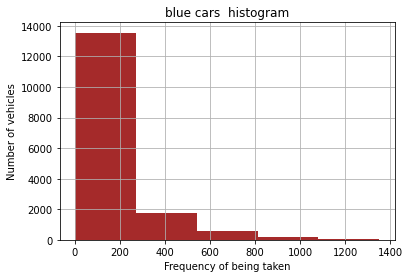

In [ ]:
autolib['BlueCars_taken_sum'].hist(bins=5,color='brown');
plt.title("blue cars  histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Frequency of being taken');

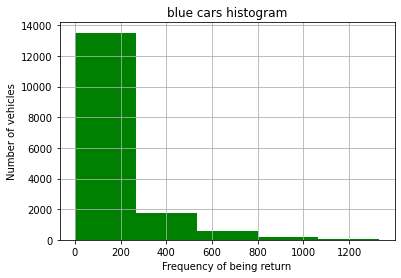

In [ ]:
autolib['BlueCars_returned_sum'].hist(bins=5,color='green');
plt.title("blue cars histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Frequency of being return');

In [ ]:
data_copy = autolib.copy
data_copy

<bound method NDFrame.copy of        Postal code       date  ...  Slots_freed_sum  Slots_taken_sum
0            75001   1/1/2018  ...               22               20
1            75001   1/2/2018  ...               23               22
2            75001   1/3/2018  ...               27               27
3            75001   1/4/2018  ...               25               21
4            75001   1/5/2018  ...               18               20
...            ...        ...  ...              ...              ...
16080        95880  6/15/2018  ...                0                0
16081        95880  6/16/2018  ...                0                0
16082        95880  6/17/2018  ...                0                0
16083        95880  6/18/2018  ...                0                0
16084        95880  6/19/2018  ...                0                0

[16085 rows x 13 columns]>

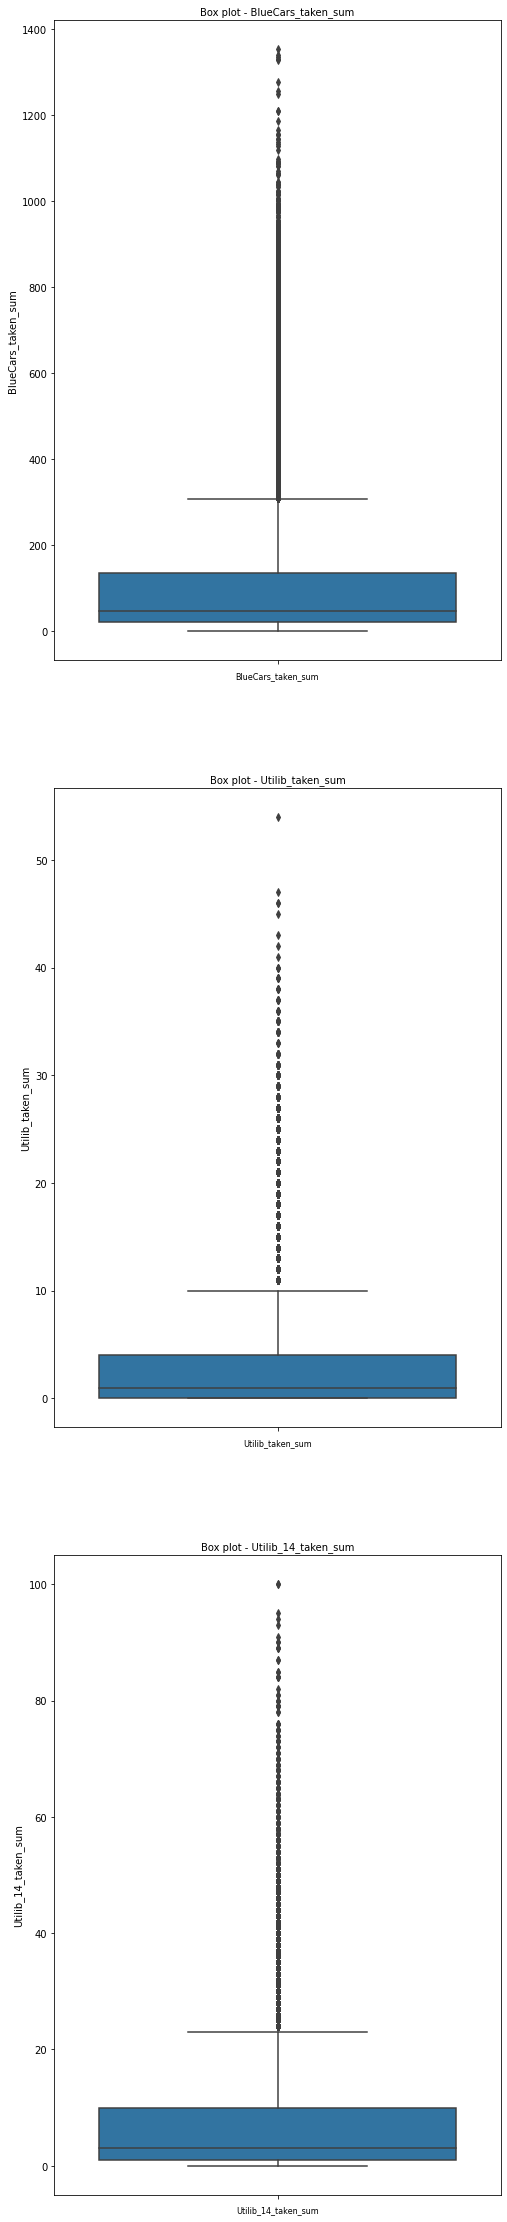

In [ ]:
# Checking for Outliers
#
col_name = ["BlueCars_taken_sum", "Utilib_taken_sum", "Utilib_14_taken_sum"]
fig, ax= plt.subplots(len(col_name), figsize=(8,40))
for i, col_val in enumerate(col_name):
        sns.boxplot(y=autolib[col_val], ax=ax[i])
        ax[i].set_title('Box plot - '+col_val, fontsize=10)
        ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

In [ ]:
autolib['Slots_taken_sum'].value_counts()

0      10235
1        545
2        476
3        405
4        309
       ...  
330        1
338        1
346        1
267        1
315        1
Name: Slots_taken_sum, Length: 301, dtype: int64

Quantile-Quantile (Q-Q) Plot

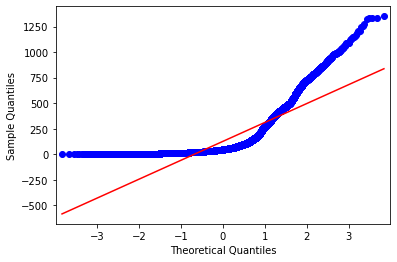

In [ ]:
# Importing libraries to plot our Q-Q plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# seed the random number generator
seed(1)

# generate univariate observations
data = autolib["BlueCars_taken_sum"]

# q-q plot
qqplot(data, line='s')
pyplot.show()

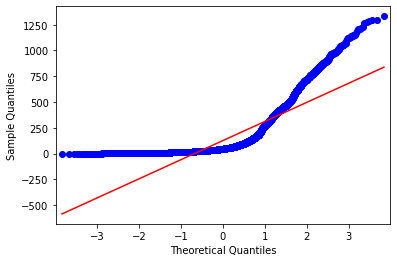

In [ ]:
# seed the random number generator
seed(1)

# generate univariate observations
data = autolib["BlueCars_returned_sum"]

# q-q plot
qqplot(data, line='s')
pyplot.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


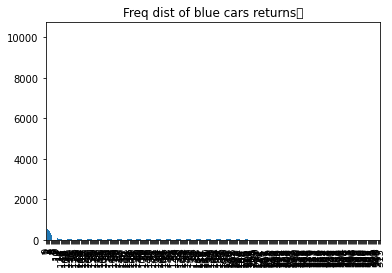

In [ ]:
autolib['Slots_taken_sum'].value_counts().plot.bar(title='Freq dist of blue cars returns	')
plt.show()

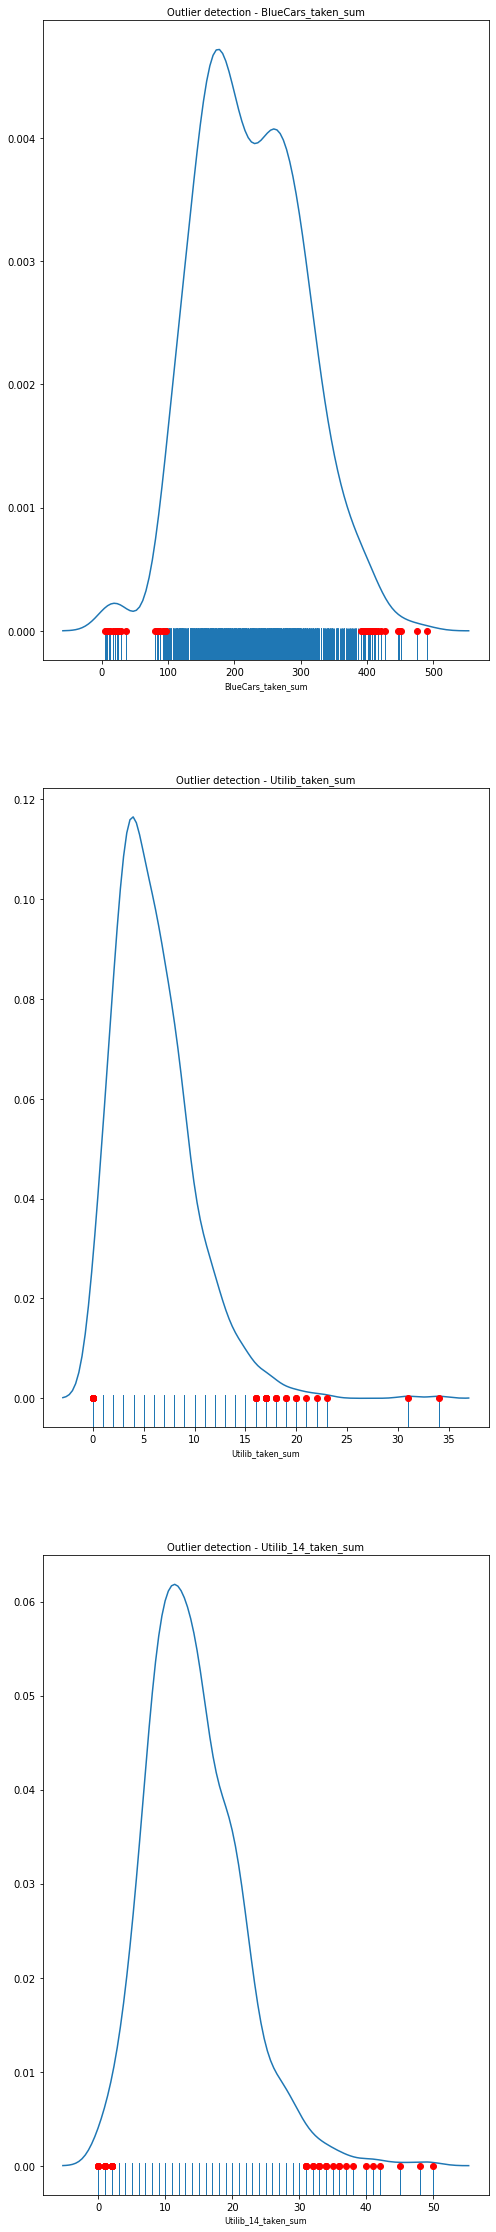

In [ ]:
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = ["BlueCars_taken_sum", "Utilib_taken_sum", "Utilib_14_taken_sum"]

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
    x = autolib[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

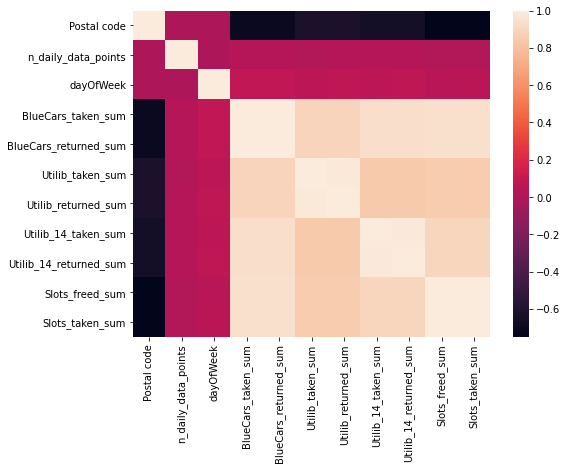

In [ ]:
f, ax = plt.subplots(figsize=(8,6))
corr = autolib.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values )
plt.show()

Bivariate Analysis

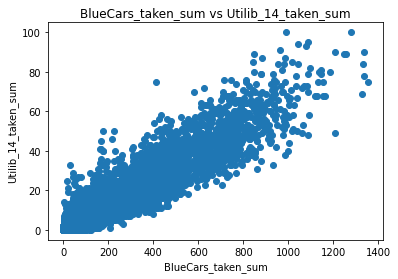

In [ ]:
##Plotting scatterplot
plt.scatter(autolib['BlueCars_taken_sum'], autolib['Utilib_14_taken_sum'])
plt.title('BlueCars_taken_sum vs Utilib_14_taken_sum')
plt.xlabel('BlueCars_taken_sum')
plt.ylabel('Utilib_14_taken_sum')
plt.show()

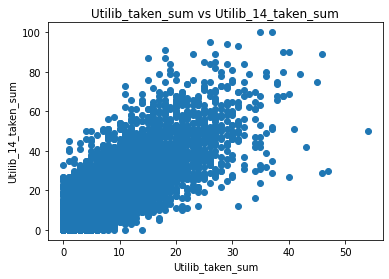

In [ ]:
plt.scatter(autolib['Utilib_taken_sum'], autolib['Utilib_14_taken_sum'])
plt.title('Utilib_taken_sum vs Utilib_14_taken_sum')
plt.xlabel('Utilib_taken_sum')
plt.ylabel('Utilib_14_taken_sum')
plt.show()

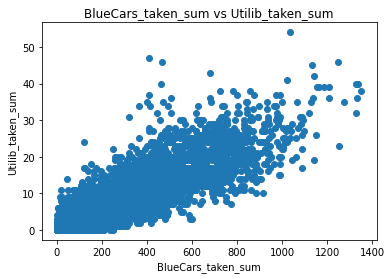

In [ ]:
plt.scatter(autolib['BlueCars_taken_sum'], autolib['Utilib_taken_sum'])
plt.title('BlueCars_taken_sum vs Utilib_taken_sum')
plt.xlabel('BlueCars_taken_sum')
plt.ylabel('Utilib_taken_sum')
plt.show()

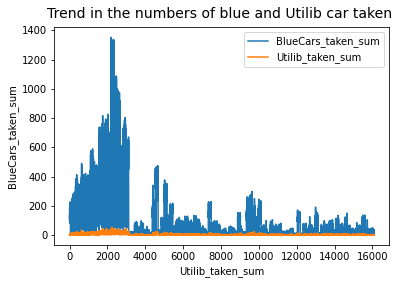

In [ ]:

autolib[["BlueCars_taken_sum","Utilib_taken_sum" ]].plot()
plt.title("Trend in the numbers of blue and Utilib car taken ", fontsize=14, y=1.015)
plt.ylabel('BlueCars_taken_sum')
plt.xlabel('Utilib_taken_sum')
plt.show()

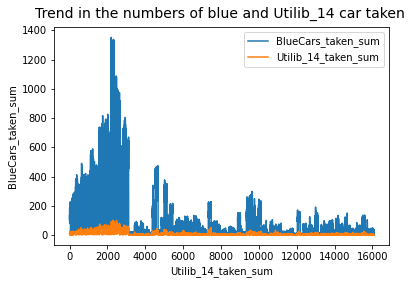

In [ ]:
autolib[["BlueCars_taken_sum","Utilib_14_taken_sum" ]].plot()
plt.title("Trend in the numbers of blue and Utilib_14 car taken ", fontsize=14, y=1.015)
plt.ylabel('BlueCars_taken_sum')
plt.xlabel('Utilib_14_taken_sum')
plt.show()

In [ ]:
pearson_coeff = autolib["BlueCars_taken_sum"].corr(autolib["Utilib_taken_sum"], method="pearson") 
print(pearson_coeff)
coeff = autolib["BlueCars_taken_sum"].corr(autolib["Utilib_taken_sum"]) 
print(coeff)

0.8938325700709975
0.8938325700709975


The car taken sum  and the utilib taken sum are highly correlated

In [ ]:
autolib.groupby("day_type").value_counts()

In [ ]:
autolib["day_type"].value_counts()

weekday    11544
weekend     4541
Name: day_type, dtype: int64





 Hypothesis Testing 

In [ ]:
aver1 = statistics.mean(autolib["BlueCars_taken_sum"])
(round(aver1, 5))

125.92695

In [ ]:
aver2 = statistics.mean(autolib["stats.shapiro(data.Control.dropna())"])
(round(aver2, 5))

3.69829

In [ ]:
stats.shapiro(autolib.BlueCars_taken_sum.dropna())

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.661232590675354, 0.0)

Since p > 0.05 for both data sets, they both conform to the normality criterion

In [ ]:
stats.ttest_1samp(autolib["BlueCars_taken_sum"],100)


Ttest_1sampResult(statistic=17.733317385626133, pvalue=1.0679495852947432e-69)

In [ ]:
autolib.iloc[100]

Postal code                   75001
date                      4/14/2018
n_daily_data_points            1440
dayOfWeek                         5
day_type                    weekend
BlueCars_taken_sum              219
BlueCars_returned_sum           219
Utilib_taken_sum                  5
Utilib_returned_sum               5
Utilib_14_taken_sum              13
Utilib_14_returned_sum           13
Slots_freed_sum                  35
Slots_taken_sum                  35
Name: 100, dtype: object

In [ ]:
weekdays= autolib.loc[autolib.day_type=='weekday']
weekdays

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16078,95880,6/13/2018,1440,2,weekday,12,13,0,0,1,1,0,0
16079,95880,6/14/2018,1439,3,weekday,15,13,0,0,0,0,0,0
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [ ]:
blue_cars_taken = weekdays.loc[:,["BlueCars_taken_sum"]]
blue_cars_taken

,BlueCars_taken_sum
0,110
1,98
2,138
3,104
4,114
...,...
16078,12
16079,15
16080,15
16083,11


In [ ]:
blue_taken_par = blue_cars_taken.mean()
blue_taken_par

BlueCars_taken_sum    116.028673
dtype: float64

In [ ]:
std_taken = np.std(blue_cars_taken)
std_taken

BlueCars_taken_sum    169.619558
dtype: float64

In [ ]:
fitted_data_par = scipy.stats.distributions.norm.pdf(blue_cars_taken,116.028673, 169.619558)
fitted_data_par

array([[0.0023505 ],
       [0.00233873],
       [0.00233233],
       ...,
       [0.00196969],
       [0.00194168],
       [0.00187628]])

In [ ]:
data_par_mean = fitted_data_par.mean()
data_par_mean


0.001858294825932965

In [ ]:
data_copy_1 =  weekdays.loc[:,["BlueCars_taken_sum"]]
data_copy_1

,BlueCars_taken_sum
0,110
1,98
2,138
3,104
4,114
...,...
16078,12
16079,15
16080,15
16083,11


In [ ]:
blue_cars_returned = weekdays.loc[:,["BlueCars_returned_sum"]]
blue_cars_returned

,BlueCars_returned_sum
0,103
1,94
2,139
3,104
4,117
...,...
16078,13
16079,13
16080,10
16083,14


In [ ]:
blue_returned_par = blue_cars_returned.mean()
blue_returned_par

BlueCars_returned_sum    115.63938
dtype: float64

Sampling and testing 

In [ ]:
np.random.seed(5)
BlueCars_taken  = blue_cars_taken.sample(n =400)
BlueCars_taken

,BlueCars_taken_sum
7459,161
4122,9
7150,28
2675,370
4546,359
...,...
13851,49
9710,120
11825,3
12971,104


In [ ]:
k = BlueCars_taken.mean()
k

BlueCars_taken_sum    118.98
dtype: float64

In [ ]:
n = np.std(BlueCars_taken)
n

BlueCars_taken_sum    164.86464
dtype: float64

In [ ]:
from scipy.stats import norm
np.random.seed(50)
my_sample = np.random.choice(a =data_copy_1["BlueCars_taken_sum"],size =400)
my_sample_1 = norm.fit(my_sample)

my_sample_1

(120.2725, 171.0340704180018)

In [ ]:
bC_sample = data_copy_1.loc[(data_copy_1['BlueCars_taken_sum']> my_sample_1[0]) &(data_copy_1["BlueCars_taken_sum"]< my_sample_1[1])]
bC_sample

,BlueCars_taken_sum
2,138
10,125
11,126
17,122
18,130
...,...
12169,121
12176,141
12180,153
12187,151


Testing for normality

In [ ]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
data = autolib["BlueCars_returned_sum"]
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=1983.166
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [ ]:
stat, p = normaltest(blue_cars_taken)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=5404.107, p=0.000
Sample does not look Gaussian


In [ ]:
stat, p = normaltest(BlueCars_Returned)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=241.866, p=0.000
Sample does not look Gaussian


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(BlueCars_taken)
BlueCars_taken = scaler.transform(BlueCars_taken)

In [ ]:
fitted_data = scipy.stats.distributions.norm.pdf(BlueCars_taken,-3.552713678800501e-17, 1)
fitted_data

array([[3.86192488e-01],
       [3.19357256e-01],
       [3.42595134e-01],
       [1.25171921e-01],
       [1.38248269e-01],
       [3.14137519e-01],
       [3.23204018e-01],
       [3.49313837e-01],
       [3.24472665e-01],
       [3.52547292e-01],
       [3.48216999e-01],
       [3.52504751e-01],
       [3.57739702e-01],
       [3.96566326e-01],
       [3.45995453e-01],
       [3.48216999e-01],
       [3.45995453e-01],
       [3.37939189e-01],
       [3.37939189e-01],
       [3.57739702e-01],
       [3.21928487e-01],
       [3.25734307e-01],
       [3.36754149e-01],
       [3.57739702e-01],
       [2.73838637e-01],
       [3.42595134e-01],
       [6.13517081e-02],
       [3.16759943e-01],
       [3.10158940e-01],
       [3.73394901e-01],
       [3.42595134e-01],
       [3.33150350e-01],
       [3.81691521e-01],
       [2.02459221e-01],
       [3.19357256e-01],
       [2.28547079e-01],
       [3.48216999e-01],
       [3.23204018e-01],
       [3.65507155e-01],
       [3.35560917e-01],


In [ ]:
X1 = fitted_data.mean()
X1

0.3055898041252002

In [ ]:
print(np.var(fitted_data))

0.010070692419879483


In [ ]:
std_taken = np.std(fitted_data)
std_taken

0.10035283962040877

In [ ]:
np.random.seed(3)
BlueCars_Returned  =blue_cars_returned.sample(n = 376)
BlueCars_Returned

,BlueCars_returned_sum
13657,26
2815,391
104,124
15172,21
8142,22
...,...
11178,40
8959,105
10509,7
10508,2


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(BlueCars_Returned)
BlueCars_Returned = scaler.transform(BlueCars_Returned)

In [ ]:
fitted_data2 = scipy.stats.distributions.norm.pdf(BlueCars_taken,-3.552713678800501e-17, 1)
fitted_data2

array([[3.86192488e-01],
       [3.19357256e-01],
       [3.42595134e-01],
       [1.25171921e-01],
       [1.38248269e-01],
       [3.14137519e-01],
       [3.23204018e-01],
       [3.49313837e-01],
       [3.24472665e-01],
       [3.52547292e-01],
       [3.48216999e-01],
       [3.52504751e-01],
       [3.57739702e-01],
       [3.96566326e-01],
       [3.45995453e-01],
       [3.48216999e-01],
       [3.45995453e-01],
       [3.37939189e-01],
       [3.37939189e-01],
       [3.57739702e-01],
       [3.21928487e-01],
       [3.25734307e-01],
       [3.36754149e-01],
       [3.57739702e-01],
       [2.73838637e-01],
       [3.42595134e-01],
       [6.13517081e-02],
       [3.16759943e-01],
       [3.10158940e-01],
       [3.73394901e-01],
       [3.42595134e-01],
       [3.33150350e-01],
       [3.81691521e-01],
       [2.02459221e-01],
       [3.19357256e-01],
       [2.28547079e-01],
       [3.48216999e-01],
       [3.23204018e-01],
       [3.65507155e-01],
       [3.35560917e-01],


In [ ]:
Y1 = fitted_data2.mean()
Y1

0.3055898041252002

In [ ]:
std_returned =np.std(fitted_data2)
std_returned

0.10035283962040877

Hypothesis Testing

H0: There are more cars taken during the weekday than return 
H1: There are less cars return during the week than taken

Calculating the z-score for the blue car taken 

In [ ]:
zscore = (0.3055898041252002-0.001858294825932965)/(0.10035283962040877)
zscore


3.0266359222932975

In [ ]:
from scipy.stats import norm
prob = stats.norm.cdf(zscore)
prob

0.9987635419366295

The p_value is 0.9987 > 0.05 there for we fails to reject Null hypothesis